## MODELOS DE SERIES DE TIEMPO PARA DEMANDA DE GAS NATURAL EN SECTOR ELÉCTRICO EN MÉXICO 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from sympy import true
from datetime import datetime, timedelta
register_matplotlib_converters()
from time import time 


Vamos a leer la data de Demanda en sector eléctrico

In [2]:
demanda_electrico_original = pd.read_excel(R'Demanda_electrico_2022_full1.xlsx')
demanda_electrico_original

,Date,Demanded_Gas
0,2005-01-01,1819.58
1,2005-02-01,1895.33
2,2005-03-01,1765.86
3,2005-04-01,1642.70
4,2005-05-01,1895.54
...,...,...
208,2022-05-01,3350.03
209,2022-06-01,3498.70
210,2022-07-01,3350.97
211,2022-08-01,3506.42


Vamos a graficar los datos "originales" de demanda eléctrico desde 2005 hasta 2022

Text(0, 0.5, 'Demanda [MMpcd]')

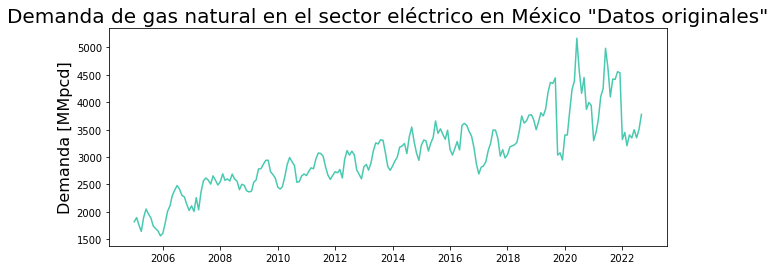

In [3]:
plt.figure(figsize=(10,4))
plt.plot(demanda_electrico_original['Date'], demanda_electrico_original['Demanded_Gas'], color='#48C9B0')
plt.title('Demanda de gas natural en el sector eléctrico en México "Datos originales"', fontsize=20)
plt.ylabel('Demanda [MMpcd]', fontsize =16)

Vamos a descomponer la serie de tiempo de datos "originales" de demanda eléctrico desde 2005 hasta 2022 en sus compoentes de Tendencia, Estacionalidad y Residual

In [6]:
demanda_electrico_original['Demanded_Gas']

0      1819.58
1      1895.33
2      1765.86
3      1642.70
4      1895.54
        ...   
208    3350.03
209    3498.70
210    3350.97
211    3506.42
212    3778.37
Name: Demanded_Gas, Length: 213, dtype: float64

The error "ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None" occurs when the seasonal_decompose function from the statsmodels.tsa.seasonal module is not able to determine the frequency of the time series data automatically
1
3
4
. To solve this error, you need to specify the frequency of the time series data explicitly by setting the period parameter in the seasonal_decompose function
1
3
4
. The period parameter specifies the number of data points in each seasonal cycle of the time series data. For example, if the time series data has a seasonal cycle of 12 months, the period parameter should be set to 12.

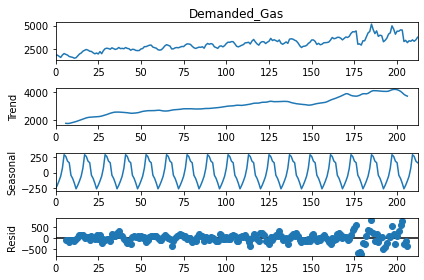

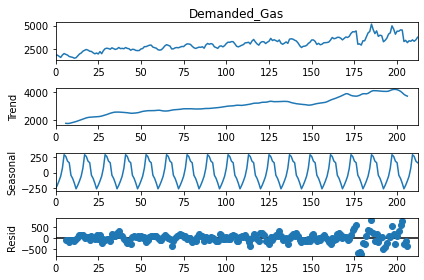

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

demanda_electrico_original_seasonal_decomposition = seasonal_decompose(demanda_electrico_original['Demanded_Gas'], period=12)
demanda_electrico_original_seasonal_decomposition.plot()

Se lleva a cabo el proceso de prueba estacionariedad de Dickey-Fulley a la Demanda de gas natural en el sector eléctrico en México "Datos originales"

In [5]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Perform ADF test for stationarity
adf_test_electrico_original_sin_diferenciar = adfuller(demanda_electrico_original['Demanded_Gas'])


adf_test_electrico_original_sin_diferenciar

(-1.9362234591018295,
 0.3152169397511435,
 15,
 197,
 {'1%': -3.463987334463603,
  '5%': -2.8763259091636213,
  '10%': -2.5746515171738515},
 2667.963876967698)

En la prueba DF H0 que establece que la serie NO es estacionaria. Es decir que el valor de la Unit Root p=1 y por lo tanto la serie era una especie de ruido blanco. 
Ha: Establece qe p<1 y por lo tanto la serie tiene un componente determinístico que la hace tender hacia un valor medio  

In [18]:

print(f"The ADF statistic value f is: {adf_test_electrico_original_sin_diferenciar[0]}")

print(f"The ADF p value p is: {adf_test_electrico_original_sin_diferenciar[1]}")

if adf_test_electrico_original_sin_diferenciar[0] < adf_test_electrico_original_sin_diferenciar[4]['5%']:
    print("Se rechaza H0: SI existe suficiente evidencia para rechazar H0 que indica la existencia de raiz unitaria y por lo tanto de no estacionariedad")
else:
    print("Se acepta H0: NO existe suficiente evidencia para rechazar H0 que indica la existencia de raiz unitaria y por lo tanto de no estacionariedad")


The ADF statistic value f is: -1.9362234591018295
The ADF p value p is: 0.3152169397511435
Se acepta H0: NO existe suficiente evidencia para rechazar H0 que indica la existencia de raiz unitaria y por lo tanto de no estacionariedad


Se observa que el valor de p NO es menor a 0.05 porlo que NO se rechaza 

Se elaboran las gráficas de ACF y PACF de la Demanda de gas natural en el sector eléctrico en México con los "Datos originales"

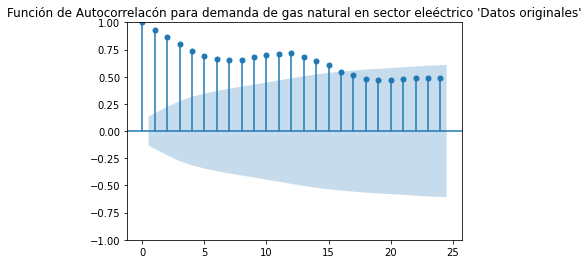

In [9]:
import statsmodels.graphics.tsaplots as tsaplot
# Create the Matplotlib axes object
fig, ax = plt.subplots()

# Plot the ACF
tsaplot.plot_acf(demanda_electrico_original['Demanded_Gas'].dropna(), ax=ax)

# Set the title
ax.set_title("Función de Autocorrelacón para demanda de gas natural en sector eleéctrico 'Datos originales'")

# Show the plot
plt.show()

c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


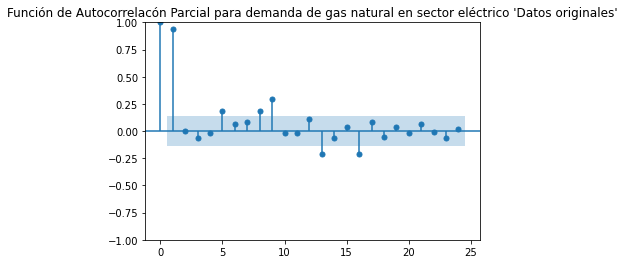

In [10]:
import statsmodels.graphics.tsaplots as tsaplot
# Create the Matplotlib axes object
fig, ax = plt.subplots()

# Plot the ACF
tsaplot.plot_pacf(demanda_electrico_original['Demanded_Gas'].dropna(), ax=ax)

# Set the title
ax.set_title("Función de Autocorrelacón Parcial para demanda de gas natural en sector eléctrico 'Datos originales'")

# Show the plot
plt.show()

Se procede entonces a diferenciar la serie para lograr estacionariedad 

In [11]:
demanda_electrico_original_diff1 = demanda_electrico_original['Demanded_Gas'].diff()
demanda_electrico_original_diff1

0         NaN
1       75.75
2     -129.47
3     -123.16
4      252.84
        ...  
208    -53.41
209    148.67
210   -147.73
211    155.45
212    271.95
Name: Demanded_Gas, Length: 213, dtype: float64

Se grafica la diferencia de demanda en el sector eléctrico 

Text(0, 0.5, ' Diferencia Demanda [MMpcd]')

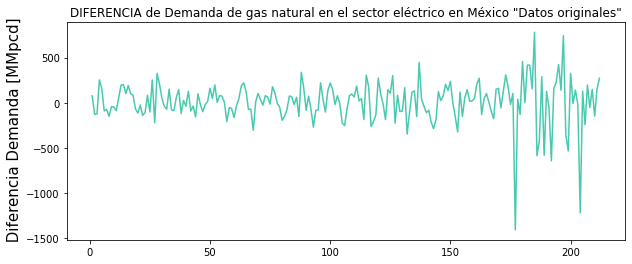

In [12]:
plt.figure(figsize=(10,4))
plt.plot(demanda_electrico_original_diff1, color='#48C9B0')
plt.title('DIFERENCIA de Demanda de gas natural en el sector eléctrico en México "Datos originales"')
plt.ylabel(' Diferencia Demanda [MMpcd]', fontsize =15)

Se lleva a cabo el proceso de prueba estacionariedad de Dickey-Fulley a la DIFERENCIA1 Demanda de gas natural en el sector eléctrico en México "Datos originales"

In [13]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Check for infinite or NaN values
demanda_electrico_original_diff1.dropna(inplace=True)

# Perform ADF test
adf_test_electrico_original_diferencia1 = adfuller(demanda_electrico_original_diff1)


adf_test_electrico_original_diferencia1

(-4.063276407512036,
 0.0011131147894365412,
 15,
 196,
 {'1%': -3.464161278384219,
  '5%': -2.876401960790147,
  '10%': -2.5746921001665974},
 2657.205881461088)

Se observa que el valor de p SI es menor a 0.05 porlo que SI se rechaza H0 que establece que la serie NO es estacionaria. 

Se elaboran las gráficas de ACF y PACF de la DIFERENCIA de Demanda de gas natural en el sector eléctrico en México

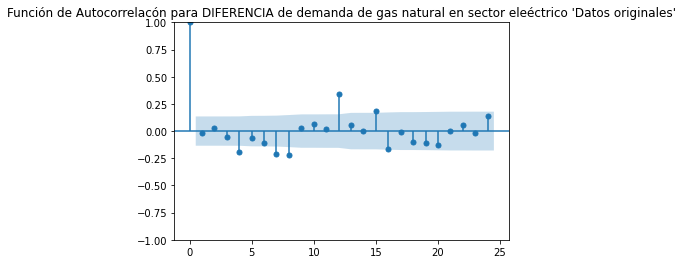

In [14]:
import statsmodels.graphics.tsaplots as tsaplot
# Create the Matplotlib axes object
fig, ax = plt.subplots()

# Plot the ACF
tsaplot.plot_acf(demanda_electrico_original_diff1.dropna(), ax=ax)

# Set the title
ax.set_title("Función de Autocorrelacón para DIFERENCIA de demanda de gas natural en sector eleéctrico 'Datos originales'")

# Show the plot
plt.show()

c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


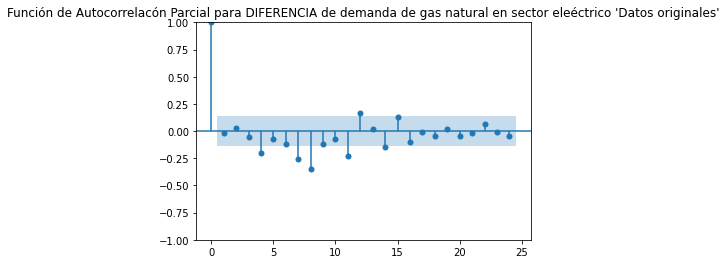

In [15]:
import statsmodels.graphics.tsaplots as tsaplot
# Create the Matplotlib axes object
fig, ax = plt.subplots()

# Plot the ACF
tsaplot.plot_pacf(demanda_electrico_original_diff1.dropna(), ax=ax)

# Set the title
ax.set_title("Función de Autocorrelacón Parcial para DIFERENCIA de demanda de gas natural en sector eleéctrico 'Datos originales'")

# Show the plot
plt.show()

Separamos la Demanda de gas natural en el sector eléctrico en data de train y test

In [16]:
demanda_electrico_original

,Date,Demanded_Gas
0,2005-01-01,1819.58
1,2005-02-01,1895.33
2,2005-03-01,1765.86
3,2005-04-01,1642.70
4,2005-05-01,1895.54
...,...,...
208,2022-05-01,3350.03
209,2022-06-01,3498.70
210,2022-07-01,3350.97
211,2022-08-01,3506.42


In [19]:
# Number of data points to keep for testing (in this case, the last 12)
num_test_points = 12

# Split the data into training and testing sets
demanda_electrico_original_train_data = demanda_electrico_original[:-num_test_points]
demanda_electrico_original_test_data = demanda_electrico_original[-num_test_points:]

demanda_electrico_original_train_data

,Date,Demanded_Gas
0,2005-01-01,1819.58
1,2005-02-01,1895.33
2,2005-03-01,1765.86
3,2005-04-01,1642.70
4,2005-05-01,1895.54
...,...,...
196,2021-05-01,4243.93
197,2021-06-01,4985.53
198,2021-07-01,4631.85
199,2021-08-01,4098.81


Se grafica la distribución de Demanda de gas natural en el sector eléctrico "Datos originales"

In [18]:
import pandas as pd
import numpy as np

# Load time series data into Pandas DataFrame
df_demanda_electrico_original_train_data = pd.DataFrame(demanda_electrico_original_train_data) 
df_demanda_electrico_original_train_data

,Date,Demanded_Gas
0,2005-01-01,1819.58
1,2005-02-01,1895.33
2,2005-03-01,1765.86
3,2005-04-01,1642.70
4,2005-05-01,1895.54
...,...,...
196,2021-05-01,4243.93
197,2021-06-01,4985.53
198,2021-07-01,4631.85
199,2021-08-01,4098.81


Se observa la distribución de probabilidad de la Demanda de gas natural en sector eléctrico "Datos originales" 

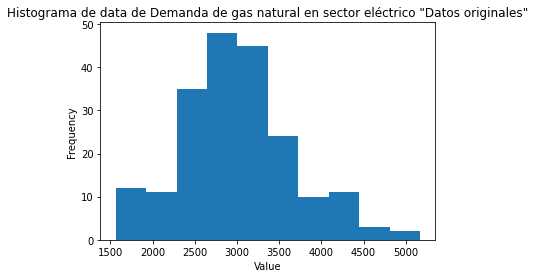

In [19]:
# Generate the histogram
plt.hist(df_demanda_electrico_original_train_data['Demanded_Gas'], bins=10)  # Adjust the number of bins as per your data

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograma de data de Demanda de gas natural en sector eléctrico "Datos originales"')

# Display the plot
plt.show()

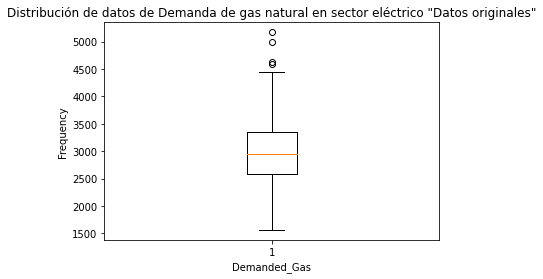

In [20]:
# Create a boxplot of the Demanded_Gas column
plt.boxplot(df_demanda_electrico_original_train_data['Demanded_Gas'])

# Add labels and title
plt.xlabel('Demanded_Gas')
plt.ylabel('Frequency')
plt.title('Distribución de datos de Demanda de gas natural en sector eléctrico "Datos originales"')

# Display the plot
plt.show()

Apliquemos un modelo ARIMA a nuestra data de Demanda de gas natural en sector eléctrico 'Datos originales'

In [21]:

##Create the model
model_ARIMA_electrico_original = ARIMA (demanda_electrico_original_train_data['Demanded_Gas'], order=(4,1,4))

##Fit the model
start = time()
model_ARIMA_electrico_original_fit = model_ARIMA_electrico_original.fit()
end = time()
print('Model fitting time', end-start)

##Summary of the model 
print(model_ARIMA_electrico_original_fit.summary())


c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model fitting time 2.1308183670043945
                               SARIMAX Results                                
Dep. Variable:           Demanded_Gas   No. Observations:                  201
Model:                 ARIMA(4, 1, 4)   Log Likelihood               -1333.392
Date:                Wed, 13 Sep 2023   AIC                           2684.783
Time:                        17:56:19   BIC                           2714.468
Sample:                             0   HQIC                          2696.796
                                - 201                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8308      0.074     11.229      0.000       0.686       0.976
ar.L2         -0.4263      0.067     -6.332      0.000      -0.558      -0.294
ar.L3         

Hagamos predicciones con el modelo ARIMA para la Demanda de gas natural en sector eleéctrico 'Datos originales'

In [42]:
##get prediction start and end dates 
pred_model_ARIMA_electrico_start_date = demanda_electrico_original_test_data.index[0]
pred_model_ARIMA_electrico_end_date = demanda_electrico_original_test_data.index[-1]

##get the predictors and residuals 
predictions_model_ARIMA_electrico_original = model_ARIMA_electrico_original_fit.predict(start=pred_model_ARIMA_electrico_start_date, end= pred_model_ARIMA_electrico_end_date)
print(predictions_model_ARIMA_electrico_original)

NameError: name 'model_ARIMA_electrico_original_fit' is not defined

Text(0, 0.5, 'Demanda [MMpcd]')

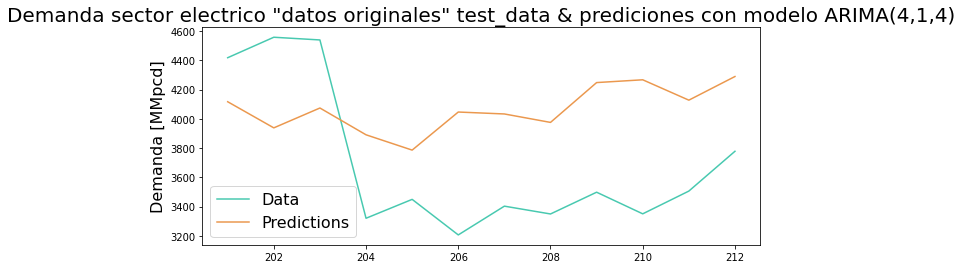

In [23]:
##Ploting the predicitons vs the test_data
plt.figure(figsize =(10,4))
plt.plot(demanda_electrico_original_test_data['Demanded_Gas'], color='#48C9B0')
plt.plot(predictions_model_ARIMA_electrico_original, color='#EB984E')
plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Demanda sector electrico "datos originales" test_data & prediciones con modelo ARIMA(4,1,4)', fontsize=20)
plt.ylabel('Demanda [MMpcd]', fontsize=16)

Cuantificando el error de las predicciones con el modelo ARIMA para la Demanda de gas natural en sector eleéctrico 'Datos originales'

In [86]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import numpy as np

# Compute errors
MAPE_predictions_model_ARIMA_electrico_original = mean_absolute_percentage_error(demanda_electrico_original_test_data['Demanded_Gas'], predictions_model_ARIMA_electrico_original)
RMSE_predictions_model_ARIMA_electrico_original = np.sqrt(mean_squared_error(demanda_electrico_original_test_data['Demanded_Gas'], predictions_model_ARIMA_electrico_original))

print('MAPE:', MAPE_predictions_model_ARIMA_electrico_original)
print('RMSE:', RMSE_predictions_model_ARIMA_electrico_original)

MAPE: 0.16739974297359148
RMSE: 623.6320827738078


### Proceso de Pretratamient (Ajuste de vaores atípicos por media aritmetica de serie)  como una estrategia para mejorar los resultados de forecast de modelos ARIMA 

Se define la función que ayudará a la sustitución de outliers por la media aritetica del valor y a lo largo del tiempo

In [24]:
outlier_threshold = 1.2

import pandas as pd

def remove_replace_outliers(data):
    # Calculate Q1 and Q3
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    # Identify outliers
    outliers_mask = (data < (Q1 - outlier_threshold * IQR)) | (data > (Q3 + outlier_threshold * IQR))

    # Calculate the historical mean excluding outliers
    historical_mean = data[~outliers_mask].mean()

    # Replace outliers with historical mean
    data.loc[outliers_mask] = historical_mean

    return data

In [25]:

demanda_electrico_tratamiento1_train_data = remove_replace_outliers(demanda_electrico_original_train_data['Demanded_Gas'])
demanda_electrico_tratamiento1_train_data

C:\Users\Sergio\AppData\Local\Temp\ipykernel_14124\3726851835.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[outliers_mask] = historical_mean


0      1819.580000
1      1895.330000
2      1765.860000
3      2923.896644
4      1895.540000
          ...     
196    2923.896644
197    2938.789381
198    2938.789381
199    4098.810000
200    2938.789381
Name: Demanded_Gas, Length: 201, dtype: float64

Se grafica de los datos de entrenamiento de la Demanda de Gas Natural en sector eléctrico sin valores atípicos (tras haber aplicado la función remove_replace_outliers)


Text(0, 0.5, 'Demanda [MMpcd]')

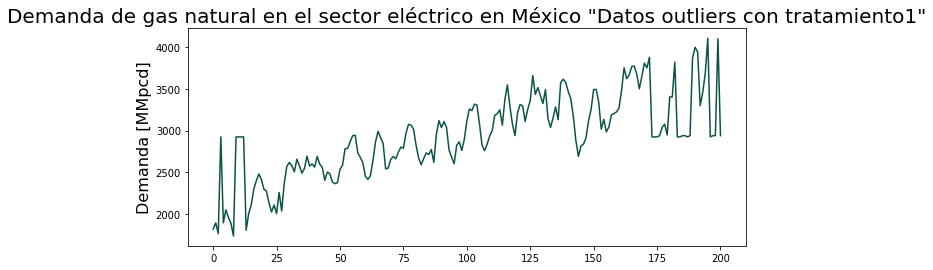

In [26]:
plt.figure(figsize=(10,4))
plt.plot(demanda_electrico_tratamiento1_train_data, color='#0B5345')
plt.title('Demanda de gas natural en el sector eléctrico en México "Datos outliers con tratamiento1"', fontsize=20)
plt.ylabel('Demanda [MMpcd]', fontsize =16)

Se grafica la distribución de Demanda de gas natural en el sector eléctrico "Datos outliers con tratamiento1"

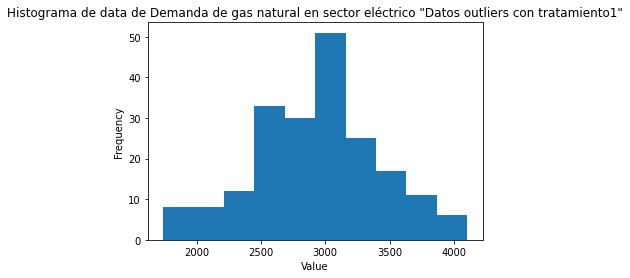

In [27]:
# Generate the histogram
plt.hist(demanda_electrico_tratamiento1_train_data, bins=10)  # Adjust the number of bins as per your data

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograma de data de Demanda de gas natural en sector eléctrico "Datos outliers con tratamiento1"')

# Display the plot
plt.show()

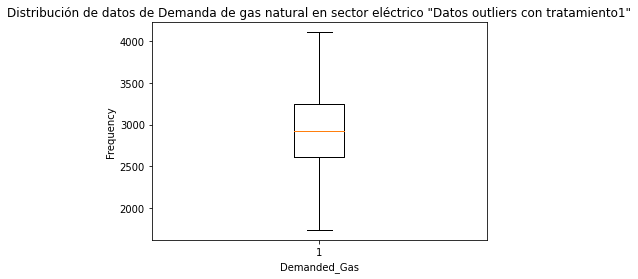

In [28]:
# Create a boxplot of the Demanded_Gas column
plt.boxplot(demanda_electrico_tratamiento1_train_data)

# Add labels and title
plt.xlabel('Demanded_Gas')
plt.ylabel('Frequency')
plt.title('Distribución de datos de Demanda de gas natural en sector eléctrico "Datos outliers con tratamiento1"')

# Display the plot
plt.show()

Se muestran las gráficas de ACF y PACF de la Demanda de gas natural en el sector eléctrico en México con los "Datos outliers con tratamiento1"

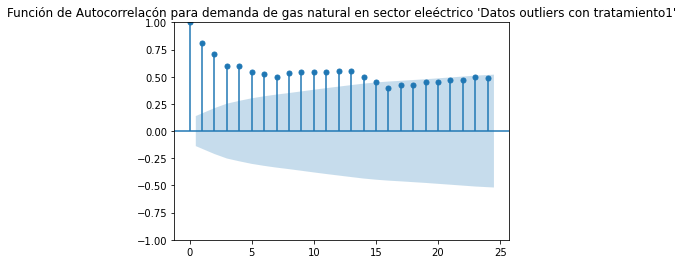

In [29]:
import statsmodels.graphics.tsaplots as tsaplot
# Create the Matplotlib axes object
fig, ax = plt.subplots()

# Plot the ACF
tsaplot.plot_acf(demanda_electrico_tratamiento1_train_data.dropna(), ax=ax)

# Set the title
ax.set_title("Función de Autocorrelacón para demanda de gas natural en sector eleéctrico 'Datos outliers con tratamiento1'")

# Show the plot
plt.show()

c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


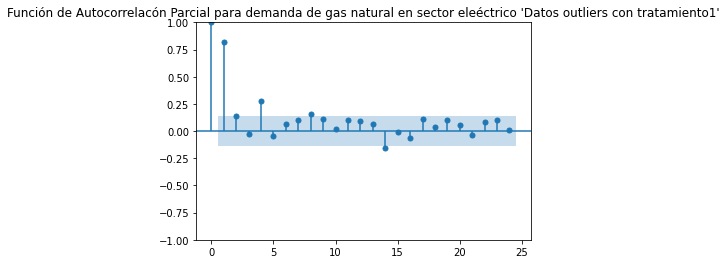

In [30]:
import statsmodels.graphics.tsaplots as tsaplot
# Create the Matplotlib axes object
fig, ax = plt.subplots()

# Plot the ACF
tsaplot.plot_pacf(demanda_electrico_tratamiento1_train_data.dropna(), ax=ax)

# Set the title
ax.set_title("Función de Autocorrelacón Parcial para demanda de gas natural en sector eleéctrico 'Datos outliers con tratamiento1'")

# Show the plot
plt.show()

Se lleva a cabo la prueba Dickey Fulley para la serie de demanda_electrico_tratamiento1_train_data 

In [32]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Perform ADF test for stationarity
adf_test_demanda_electrico_tratamiento1_train_data = adfuller(demanda_electrico_tratamiento1_train_data)


adf_test_demanda_electrico_tratamiento1_train_data

(-2.5113615166089684,
 0.11273436149641602,
 7,
 193,
 {'1%': -3.4646940755442612,
  '5%': -2.8766348847254934,
  '10%': -2.5748163958763994},
 2504.6965066189405)

In [33]:

print(f"The ADF statistic value f is: {adf_test_demanda_electrico_tratamiento1_train_data[0]}")

print(f"The ADF p value p is: {adf_test_demanda_electrico_tratamiento1_train_data[1]}")

if adf_test_demanda_electrico_tratamiento1_train_data[0] < adf_test_demanda_electrico_tratamiento1_train_data[4]['5%']:
    print("Se rechaza H0: SI existe suficiente evidencia para rechazar H0 que indica la existencia de raiz unitaria y por lo tanto de no estacionariedad")
else:
    print("Se acepta H0: NO existe suficiente evidencia para rechazar H0 que indica la existencia de raiz unitaria y por lo tanto de no estacionariedad")


The ADF statistic value f is: -2.5113615166089684
The ADF p value p is: 0.11273436149641602
Se acepta H0: NO existe suficiente evidencia para rechazar H0 que indica la existencia de raiz unitaria y por lo tanto de no estacionariedad


También para este caso  se muestran las gráficas de ACF y PACF de la DIFERENCIA de Demanda de gas natural en el sector eléctrico en México


In [31]:
demanda_electrico_tratamiento1_diff1 = demanda_electrico_tratamiento1_train_data.diff()
demanda_electrico_tratamiento1_diff1

0              NaN
1        75.750000
2      -129.470000
3      1158.036644
4     -1028.356644
          ...     
196   -1180.923356
197      14.892738
198       0.000000
199    1160.020619
200   -1160.020619
Name: Demanded_Gas, Length: 201, dtype: float64

Histograma de data de Demanda de gas natural en sector eléctrico "Datos outliers con tratamiento1" DIFERENCIA 1

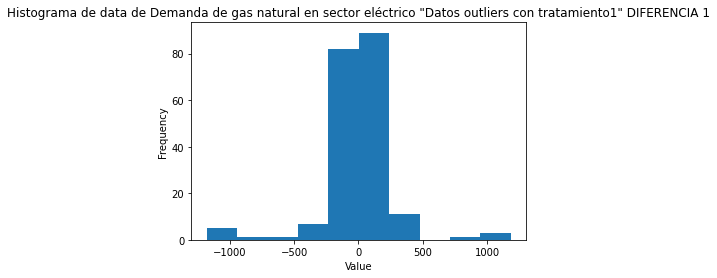

In [36]:
# Generate the histogram
plt.hist(demanda_electrico_tratamiento1_diff1.dropna(), bins=10)  # Adjust the number of bins as per your data

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograma de data de Demanda de gas natural en sector eléctrico "Datos outliers con tratamiento1" DIFERENCIA 1')

# Display the plot
plt.show()

Se lleva a cabo la prueba Dickey Fulley para la serie de demanda_electrico_tratamiento1_train_data con una diferencia 

In [34]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Perform ADF test for stationarity
adf_test_demanda_electrico_tratamiento1_train_data_diff1 = adfuller(demanda_electrico_tratamiento1_diff1.dropna())


adf_test_demanda_electrico_tratamiento1_train_data_diff1

(-4.833537943730974,
 4.689636510878358e-05,
 15,
 184,
 {'1%': -3.466398230774071,
  '5%': -2.8773796387256514,
  '10%': -2.575213838610586},
 2491.0104625594554)

In [35]:
print(f"The ADF statistic value f is: {adf_test_demanda_electrico_tratamiento1_train_data_diff1[0]}")

print(f"The ADF p value p is: {adf_test_demanda_electrico_tratamiento1_train_data_diff1[1]}")

if adf_test_demanda_electrico_tratamiento1_train_data_diff1[0] < adf_test_demanda_electrico_tratamiento1_train_data_diff1[4]['5%']:
    print("Se rechaza H0: SI existe suficiente evidencia para rechazar H0 que indica la existencia de raiz unitaria y por lo tanto de no estacionariedad")
else:
    print("Se acepta H0: NO existe suficiente evidencia para rechazar H0 que indica la existencia de raiz unitaria y por lo tanto de no estacionariedad")


The ADF statistic value f is: -4.833537943730974
The ADF p value p is: 4.689636510878358e-05
Se rechaza H0: SI existe suficiente evidencia para rechazar H0 que indica la existencia de raiz unitaria y por lo tanto de no estacionariedad


Text(0, 0.5, 'Demanda [MMpcd]')

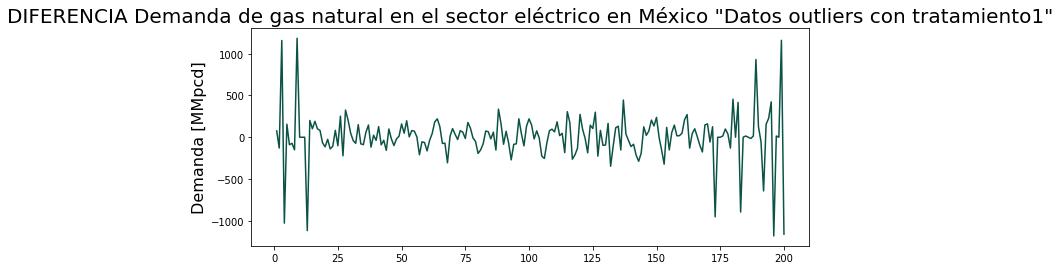

In [37]:
plt.figure(figsize=(10,4))
plt.plot(demanda_electrico_tratamiento1_diff1, color='#0B5345')
plt.title('DIFERENCIA Demanda de gas natural en el sector eléctrico en México "Datos outliers con tratamiento1"', fontsize=20)
plt.ylabel('Demanda [MMpcd]', fontsize =16)

Se muestran las gráficas de ACF y PACF de la DIFERENCIA de Demanda de gas natural en el sector eléctrico en México con los "Datos outliers con tratamiento1"

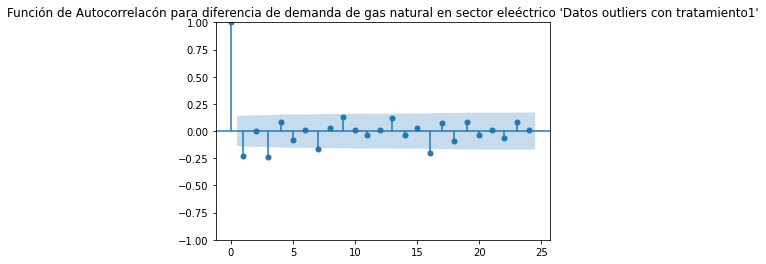

In [38]:
import statsmodels.graphics.tsaplots as tsaplot
# Create the Matplotlib axes object
fig, ax = plt.subplots()

# Plot the ACF
tsaplot.plot_acf(demanda_electrico_tratamiento1_diff1.dropna(), ax=ax)

# Set the title
ax.set_title("Función de Autocorrelacón para diferencia de demanda de gas natural en sector eleéctrico 'Datos outliers con tratamiento1'")

# Show the plot
plt.show()

c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


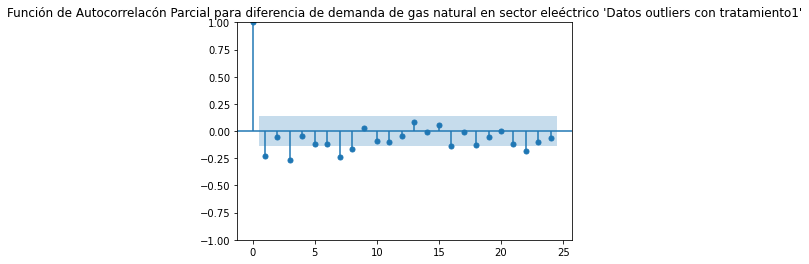

In [39]:
import statsmodels.graphics.tsaplots as tsaplot
# Create the Matplotlib axes object
fig, ax = plt.subplots()

# Plot the ACF
tsaplot.plot_pacf(demanda_electrico_tratamiento1_diff1.dropna(), ax=ax)

# Set the title
ax.set_title("Función de Autocorrelacón Parcial para diferencia de demanda de gas natural en sector eleéctrico 'Datos outliers con tratamiento1'")

# Show the plot
plt.show()

Apliquemos un modelo ARIMA a nuestra data de Demanda de gas natural en sector eléctrico 'Datos outliers con tratamiento1'

In [40]:
##Create the model
model_ARIMA_electrico_tratamiento1 = ARIMA (demanda_electrico_tratamiento1_train_data, order=(3,1,3))

##Fit the model
start = time()
model_ARIMA_electrico_tratamiento1_fit = model_ARIMA_electrico_tratamiento1.fit()
end = time()
print('Model fitting time', end-start)

##Summary of the model 
print(model_ARIMA_electrico_tratamiento1_fit.summary())


c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model fitting time 2.4011898040771484
                               SARIMAX Results                                
Dep. Variable:           Demanded_Gas   No. Observations:                  201
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -1391.909
Date:                Tue, 19 Sep 2023   AIC                           2797.818
Time:                        21:27:18   BIC                           2820.907
Sample:                             0   HQIC                          2807.162
                                - 201                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7693      0.229     -3.365      0.001      -1.217      -0.321
ar.L2          0.2899      0.135      2.155      0.031       0.026       0.553
ar.L3         

In [43]:
##get prediction start and end dates 
pred_model_ARIMA_electrico_start_date = demanda_electrico_original_test_data.index[0]
pred_model_ARIMA_electrico_end_date = demanda_electrico_original_test_data.index[-1]


In [44]:
##get the predictors and residuals 
predictions_model_ARIMA_electrico_tratamiento1 = model_ARIMA_electrico_tratamiento1_fit.predict(start=pred_model_ARIMA_electrico_start_date, end= pred_model_ARIMA_electrico_end_date)
print(predictions_model_ARIMA_electrico_tratamiento1)

201    3313.118184
202    3014.472509
203    3493.194933
204    3100.243771
205    3491.923776
206    3155.860995
207    3462.951823
208    3194.060519
209    3434.363624
210    3222.335473
211    3410.641498
212    3244.053610
Name: predicted_mean, dtype: float64


Text(0, 0.5, 'Demanda [MMpcd]')

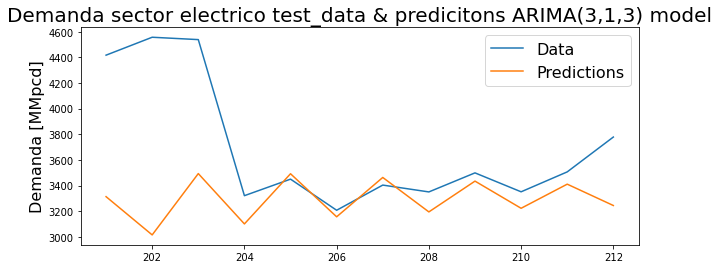

In [45]:

##Ploting the predicitons vs the test_data
plt.figure(figsize =(10,4))
plt.plot(demanda_electrico_original_test_data['Demanded_Gas'])
plt.plot(predictions_model_ARIMA_electrico_tratamiento1)
plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Demanda sector electrico test_data & predicitons ARIMA(3,1,3) model', fontsize=20)
plt.ylabel('Demanda [MMpcd]', fontsize=16)

Observamos el MAPEy RMSE de demanda_electrico_original_test_data['Demanded_Gas'] vs predictions_model_ARIMA_electrico_tratamiento1

In [46]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import numpy as np

# Compute errors
MAPE_predictions_model_ARIMA_electrico_tratamiento1 = mean_absolute_percentage_error(demanda_electrico_original_test_data['Demanded_Gas'], predictions_model_ARIMA_electrico_tratamiento1)
RMSE_predictions_model_ARIMA_electrico_tratamiento1 = np.sqrt(mean_squared_error(demanda_electrico_original_test_data['Demanded_Gas'], predictions_model_ARIMA_electrico_tratamiento1))

print('MAPE:', MAPE_predictions_model_ARIMA_electrico_tratamiento1)
print('RMSE:', RMSE_predictions_model_ARIMA_electrico_tratamiento1)

MAPE: 0.1002527708868386
RMSE: 651.27384517926


Vamos a entrenar un segundo modelo 

In [47]:
##Create the model
model_ARIMA_electrico_tratamiento1_v2 = ARIMA (demanda_electrico_tratamiento1_train_data, order=(2,1,3))

##Fit the model
start = time()
model_ARIMA_electrico_tratamiento1_v2_fit = model_ARIMA_electrico_tratamiento1_v2.fit()
end = time()
print('Model fitting time', end-start)

##Summary of the model 
print(model_ARIMA_electrico_tratamiento1_v2_fit.summary())


Model fitting time 0.40189051628112793
                               SARIMAX Results                                
Dep. Variable:           Demanded_Gas   No. Observations:                  201
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -1390.894
Date:                Tue, 19 Sep 2023   AIC                           2793.788
Time:                        21:31:31   BIC                           2813.578
Sample:                             0   HQIC                          2801.796
                                - 201                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4891      0.140     -3.499      0.000      -0.763      -0.215
ar.L2          0.3461      0.160      2.166      0.030       0.033       0.659
ma.L1        

In [48]:
##get the predictors and residuals 
predictions_model_ARIMA_electrico_tratamiento1_v2 = model_ARIMA_electrico_tratamiento1_v2_fit.predict(start=pred_model_ARIMA_electrico_start_date, end= pred_model_ARIMA_electrico_end_date)
print(predictions_model_ARIMA_electrico_tratamiento1_v2)

201    3298.471192
202    2990.998265
203    3473.623887
204    3131.158192
205    3465.693348
206    3183.546576
207    3437.325790
208    3215.552664
209    3411.853776
210    3239.088211
211    3391.526796
212    3257.175688
Name: predicted_mean, dtype: float64


Text(0, 0.5, 'Demanda [MMpcd]')

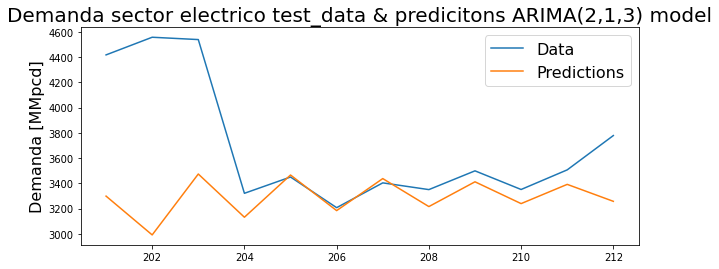

In [49]:

##Ploting the predicitons vs the test_data
plt.figure(figsize =(10,4))
plt.plot(demanda_electrico_original_test_data['Demanded_Gas'])
plt.plot(predictions_model_ARIMA_electrico_tratamiento1_v2)
plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Demanda sector electrico test_data & predicitons ARIMA(2,1,3) model', fontsize=20)
plt.ylabel('Demanda [MMpcd]', fontsize=16)

Observamos el MAPEy RMSE de demanda_electrico_original_test_data['Demanded_Gas'] vs predictions_model_ARIMA_electrico_tratamiento1_v2

In [50]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import numpy as np

# Compute errors
MAPE_predictions_model_ARIMA_electrico_tratamiento1_v2 = mean_absolute_percentage_error(demanda_electrico_original_test_data['Demanded_Gas'], predictions_model_ARIMA_electrico_tratamiento1_v2)
RMSE_predictions_model_ARIMA_electrico_tratamiento1_v2 = np.sqrt(mean_squared_error(demanda_electrico_original_test_data['Demanded_Gas'], predictions_model_ARIMA_electrico_tratamiento1_v2))

print('MAPE:', MAPE_predictions_model_ARIMA_electrico_tratamiento1_v2)
print('RMSE:', RMSE_predictions_model_ARIMA_electrico_tratamiento1_v2)

MAPE: 0.09831113006421734
RMSE: 658.3698827909684


### Proceso de pretratamiento + normalización de data como forma de abordar los valores atípicos de la serie 

In [51]:
demanda_electrico_tratamiento1_train_data

0      1819.580000
1      1895.330000
2      1765.860000
3      2923.896644
4      1895.540000
          ...     
196    2923.896644
197    2938.789381
198    2938.789381
199    4098.810000
200    2938.789381
Name: Demanded_Gas, Length: 201, dtype: float64

In [58]:
demanda_electrico_original_test_data

,Date,Demanded_Gas
201,2021-10-01,4417.51
202,2021-11-01,4557.36
203,2021-12-01,4538.89
204,2022-01-01,3320.75
205,2022-02-01,3449.80
206,2022-03-01,3206.96
207,2022-04-01,3403.44
208,2022-05-01,3350.03
209,2022-06-01,3498.70
210,2022-07-01,3350.97


Vamos a entrenar el miMax escaler 

In [52]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Create a MinMaxScaler object and fit it to the training data
MinMax_scaler_data_pre_tratada = MinMaxScaler()
MinMax_scaler_data_pre_tratada.fit(demanda_electrico_tratamiento1_train_data.values.reshape(-1, 1))


MinMaxScaler()

In [53]:

# Transform both the training and test data using the trained scaler
demanda_electrico_con_tratamiento1_scaled_train_data = MinMax_scaler_data_pre_tratada.transform(demanda_electrico_tratamiento1_train_data.values.reshape(-1, 1))
demanda_electrico_con_tratamiento1_scaled_train_data


array([[0.03401924],
       [0.06603909],
       [0.01131157],
       [0.50081863],
       [0.06612786],
       [0.13214582],
       [0.09424192],
       [0.06364236],
       [0.        ],
       [0.50081863],
       [0.50081863],
       [0.50081863],
       [0.50081863],
       [0.02841841],
       [0.11319176],
       [0.15606665],
       [0.23662986],
       [0.27889184],
       [0.31344369],
       [0.28489424],
       [0.23645655],
       [0.22606648],
       [0.16709923],
       [0.12126541],
       [0.15629491],
       [0.11316217],
       [0.21977242],
       [0.12576298],
       [0.26320951],
       [0.35004988],
       [0.37169657],
       [0.35517728],
       [0.32452277],
       [0.38810172],
       [0.35459395],
       [0.3171508 ],
       [0.342065  ],
       [0.40380518],
       [0.35363864],
       [0.36401603],
       [0.34822802],
       [0.40178043],
       [0.36330166],
       [0.34778841],
       [0.28141116],
       [0.32323352],
       [0.31442013],
       [0.272

In [56]:
##Create the model
model_ARIMA_electrico_pretratamiento_e_normalize = ARIMA (demanda_electrico_con_tratamiento1_scaled_train_data, order=(4,1,4))

##Fit the model
start = time()
model_ARIMA_electrico_pretratamiento_e_normalize_fit = model_ARIMA_electrico_pretratamiento_e_normalize.fit()
end = time()
print('Model fitting time', end-start)

##Summary of the model 
print(model_ARIMA_electrico_pretratamiento_e_normalize_fit.summary())

c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Model fitting time 0.7669320106506348
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  201
Model:                 ARIMA(4, 1, 4)   Log Likelihood                 165.857
Date:                Tue, 19 Sep 2023   AIC                           -313.713
Time:                        21:37:11   BIC                           -284.028
Sample:                             0   HQIC                          -301.700
                                - 201                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2917      0.194     -1.501      0.133      -0.672       0.089
ar.L2         -0.3243      0.133     -2.434      0.015      -0.586      -0.063
ar.L3         

c:\Users\Sergio\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [57]:
##get the predictors and residuals 
predictions_model_ARIMA_electrico_pretratamiento_e_normalize = model_ARIMA_electrico_pretratamiento_e_normalize_fit.predict(start=pred_model_ARIMA_electrico_start_date, end= pred_model_ARIMA_electrico_end_date)
print(predictions_model_ARIMA_electrico_pretratamiento_e_normalize)

[0.59628462 0.47028079 0.7465802  0.65754053 0.67403541 0.55115455
 0.72651063 0.67271675 0.68053015 0.58468356 0.70111333 0.67330055]


In [59]:
predictions_model_ARIMA_electrico_pretratamiento_e_normalize_rescale = MinMax_scaler_data_pre_tratada.inverse_transform(predictions_model_ARIMA_electrico_pretratamiento_e_normalize.reshape(-1, 1))
predictions_model_ARIMA_electrico_pretratamiento_e_normalize_rescale

array([[3149.7424579 ],
       [2851.65267777],
       [3505.29970401],
       [3294.65677373],
       [3333.67905815],
       [3042.97734518],
       [3457.82072485],
       [3330.55947692],
       [3349.043786  ],
       [3122.29760211],
       [3397.73783875],
       [3331.94057772]])

In [60]:
demanda_electrico_original_test_data['Demanded_Gas'].values

array([4417.51, 4557.36, 4538.89, 3320.75, 3449.8 , 3206.96, 3403.44,
       3350.03, 3498.7 , 3350.97, 3506.42, 3778.37])

Text(0, 0.5, 'Demanda [MMpcd]')

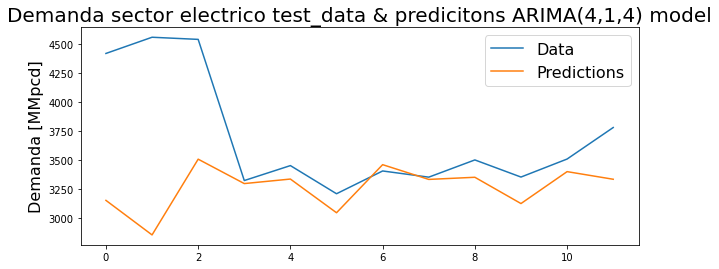

In [61]:
##Ploting the predicitons vs the test_data
plt.figure(figsize =(10,4))
plt.plot(demanda_electrico_original_test_data['Demanded_Gas'].values)
plt.plot(predictions_model_ARIMA_electrico_pretratamiento_e_normalize_rescale)
plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Demanda sector electrico test_data & predicitons ARIMA(4,1,4) model', fontsize=20)
plt.ylabel('Demanda [MMpcd]', fontsize=16)

Observamos el MAPEy RMSE de demanda_electrico_original_test_data['Demanded_Gas'] vs predictions_model_ARIMA_electrico_normalize_original_rescale

In [62]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import numpy as np
# Compute errors
MAPE_predictions_model_ARIMA_electrico_pretratamiento_e_normalize_rescale = mean_absolute_percentage_error(demanda_electrico_original_test_data['Demanded_Gas'], predictions_model_ARIMA_electrico_pretratamiento_e_normalize_rescale)
RMSE_predictions_model_ARIMA_electrico_pretratamiento_e_normalize_rescale = np.sqrt(mean_squared_error(demanda_electrico_original_test_data['Demanded_Gas'], predictions_model_ARIMA_electrico_pretratamiento_e_normalize_rescale))

print('MAPE:', MAPE_predictions_model_ARIMA_electrico_pretratamiento_e_normalize_rescale)
print('RMSE:', RMSE_predictions_model_ARIMA_electrico_pretratamiento_e_normalize_rescale)

MAPE: 0.10529891518610834
RMSE: 702.09042652727
